In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
df=pd.read_csv('births.csv')

In [11]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [12]:
df.isnull()

,year,month,day,gender,births
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
15542,False,False,True,False,False
15543,False,False,True,False,False
15544,False,False,True,False,False
15545,False,False,True,False,False


In [14]:
df['day'].fillna(0,inplace=True)

In [15]:
df['day']=df['day'].astype(int)

In [17]:
df['decade']=10*(df['year']//10)
df['decade']

0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
15542    2000
15543    2000
15544    2000
15545    2000
15546    2000
Name: decade, Length: 15547, dtype: int64

In [20]:
birth_decade=df.pivot_table('births',index='decade',columns='gender',aggfunc='sum')
birth_decade

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


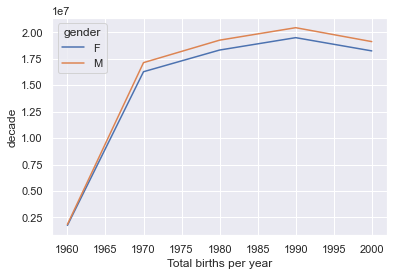

In [22]:
birth_decade.plot()
plt.xlabel('Total births per year')
plt.ylabel('decade')
plt.show()

In [24]:
quartiles = np.percentile(df['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [26]:
df = df.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
df['day'] = df['day'].astype(int)
df.index = pd.to_datetime(10000 * df.year +
                              100 * df.month +
                              df.day, format='%Y%m%d')

In [27]:
df['dayofweek'] = df.index.dayofweek

<ipython-input-28-2e5a2988b498>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


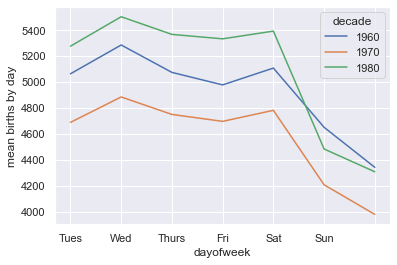

In [28]:
df.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [30]:
births_month = df.pivot_table('births', [df.index.month, df.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


<ipython-input-30-08d6ad0d20ad>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day)


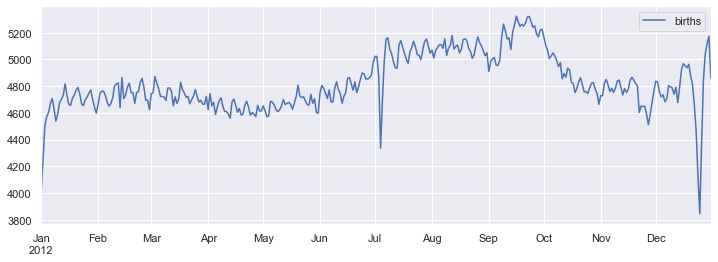

In [31]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()